In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#data exploration

In [ ]:
data=pd.read_csv("/content/Customer_Data.csv")

In [ ]:
data

,Customer ID,Age,Gender,Annual Income,Spending Score
0,1,62,Male,56564,86
1,2,65,Male,25393,73
2,3,18,Male,143520,39
3,4,21,Male,64711,43
4,5,21,Male,147014,98
...,...,...,...,...,...
995,996,54,Female,138520,5
996,997,19,Male,108436,16
997,998,47,Male,131103,61
998,999,23,Male,59332,1


In [ ]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   int64 
 1   Age             1000 non-null   int64 
 2   Gender          1000 non-null   object
 3   Annual Income   1000 non-null   int64 
 4   Spending Score  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
data.describe()

,Customer ID,Age,Annual Income,Spending Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,84856.809000,47.859000
std,288.819436,15.242311,38393.323903,28.606038
min,1.000000,18.000000,20359.000000,1.000000
25%,250.750000,30.000000,51173.750000,23.000000
50%,500.500000,43.000000,84462.000000,47.000000
75%,750.250000,56.000000,118356.250000,73.000000
max,1000.000000,69.000000,149870.000000,99.000000


In [ ]:
data=data.drop(columns=['Customer ID'],axis=1)

In [ ]:
data.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
data.isnull().any()

Age               False
Gender            False
Annual Income     False
Spending Score    False
dtype: bool

In [ ]:
data.isnull().sum()

Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

<ipython-input-15-253ed8f208ed>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],bins=15)
<ipython-input-15-253ed8f208ed>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],bins=15)
<ipython-input-15-253ed8f208ed>:7: UserWarning: 

`distplot` is a deprecated function and will be re

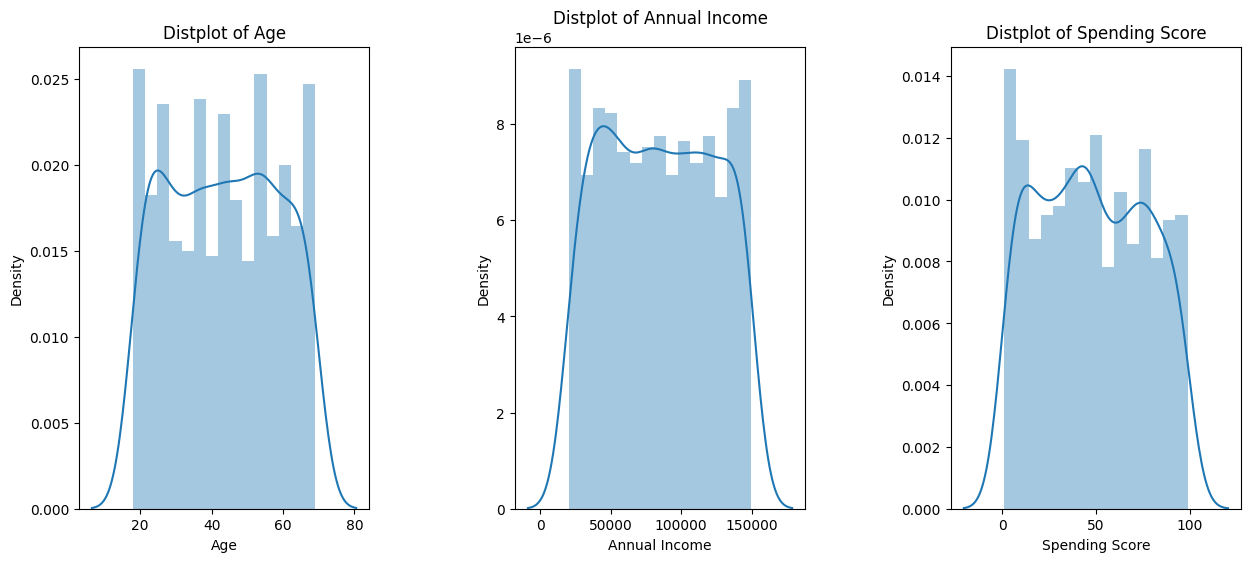

In [ ]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income','Spending Score']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(data[x],bins=15)
  plt.title('Distplot of {}'.format(x))
plt.show()


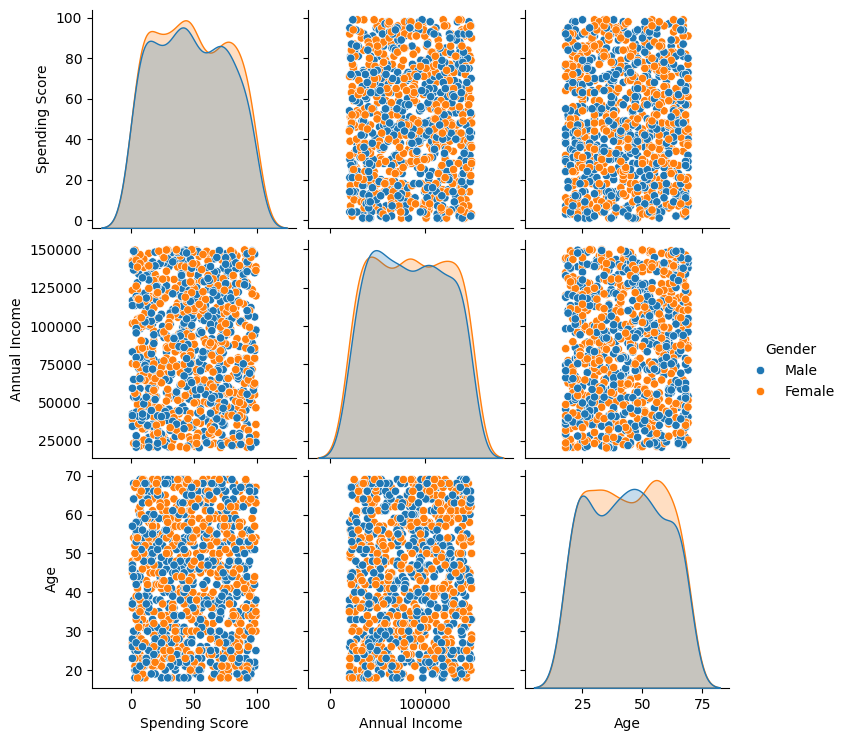

In [ ]:
sns.pairplot(data,vars=['Spending Score','Annual Income','Age'],hue='Gender')

<ipython-input-23-e80e507edcd0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], color='skyblue')


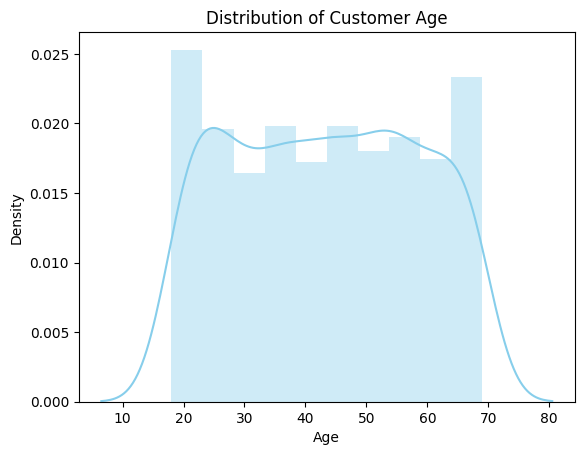

In [ ]:
# Distribution plot for age
sns.distplot(data['Age'], color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<ipython-input-24-4539dc8e0276>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='pink')


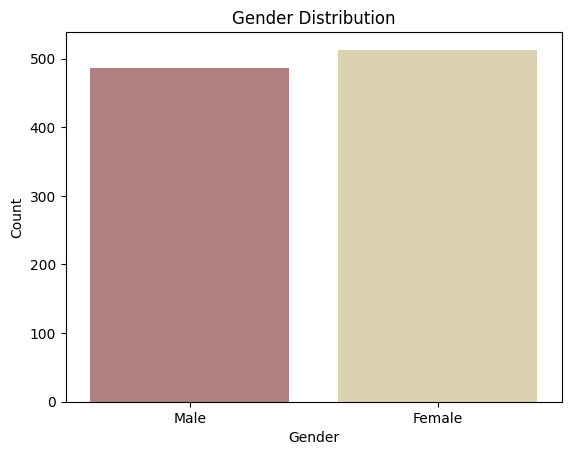

In [ ]:

# Bar plot for gender
sns.countplot(data=data, x='Gender', palette='pink')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

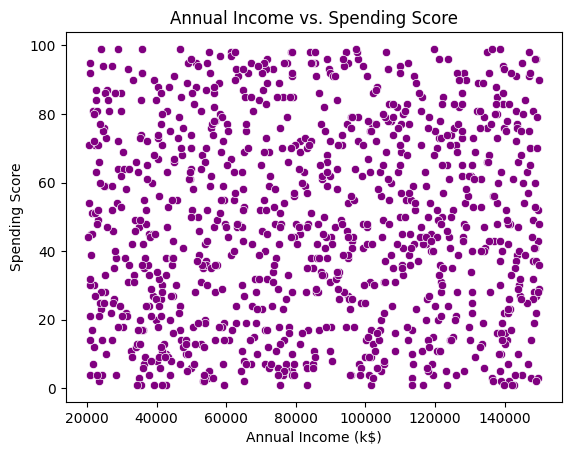

In [ ]:
# Scatter plot for annual income vs. spending score
sns.scatterplot(data=data, x='Annual Income', y='Spending Score', color='purple')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

#Data Preprocessing

In [ ]:
#outlier detection
data.head()

,Age,Gender,Annual Income,Spending Score
0,62,Male,56564,86
1,65,Male,25393,73
2,18,Male,143520,39
3,21,Male,64711,43
4,21,Male,147014,98


<Axes: ylabel='Age'>

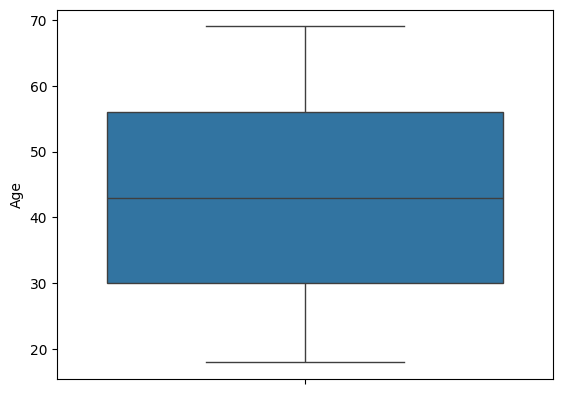

In [ ]:
sns.boxplot(data.Age)

<Axes: ylabel='Annual Income'>

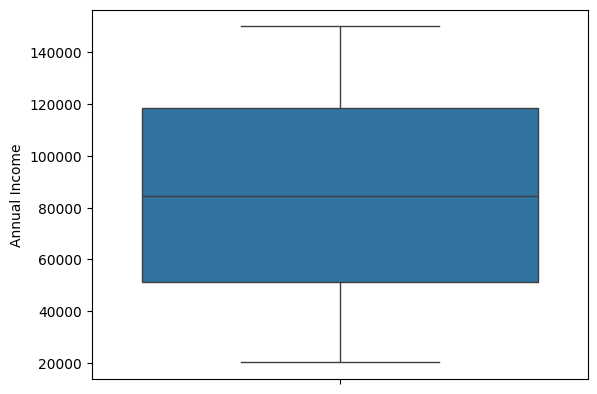

In [ ]:
sns.boxplot(data["Annual Income"])

<Axes: ylabel='Spending Score'>

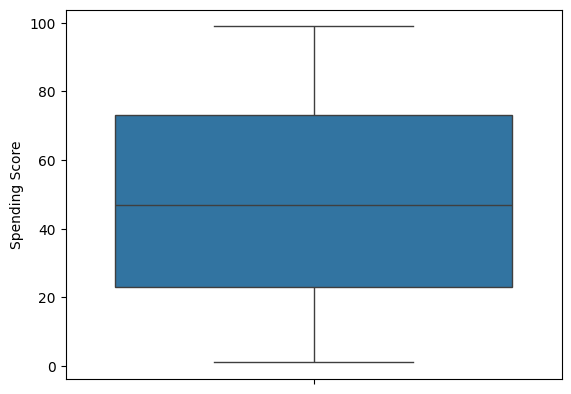

In [ ]:
sns.boxplot(data['Spending Score'])

In [ ]:
#Encoding
data.head()

,Age,Gender,Annual Income,Spending Score
0,62,Male,56564,86
1,65,Male,25393,73
2,18,Male,143520,39
3,21,Male,64711,43
4,21,Male,147014,98


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data.Gender=le.fit_transform(data.Gender)

In [ ]:
data.head()

,Age,Gender,Annual Income,Spending Score
0,62,1,56564,86
1,65,1,25393,73
2,18,1,143520,39
3,21,1,64711,43
4,21,1,147014,98


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [ ]:
data_scaled=pd.DataFrame(scale.fit_transform(data),columns=data.columns)

In [ ]:
data_scaled.head()

,Age,Gender,Annual Income,Spending Score
0,0.862745,1.0,0.279552,0.867347
1,0.921569,1.0,0.038869,0.734694
2,0.000000,1.0,0.950969,0.387755
3,0.058824,1.0,0.342457,0.428571
4,0.058824,1.0,0.977948,0.989796


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (800, 4)
Testing set shape: (200, 4)


#clustering analysis

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

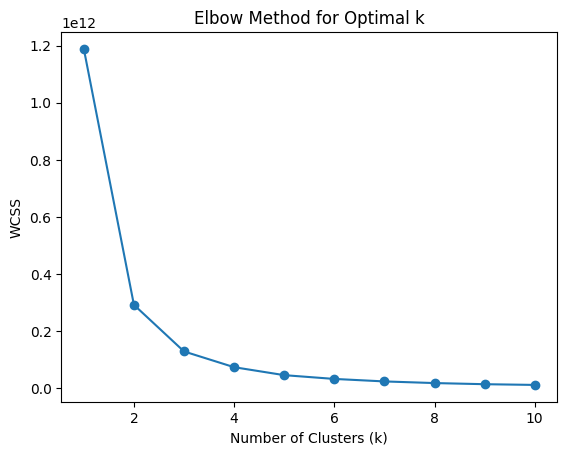

In [ ]:
# Calculate WCSS for different k values
wcss = []
max_k = 10  # You can adjust this based on your problem
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42)
x_train['group']=kmeans.fit_predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


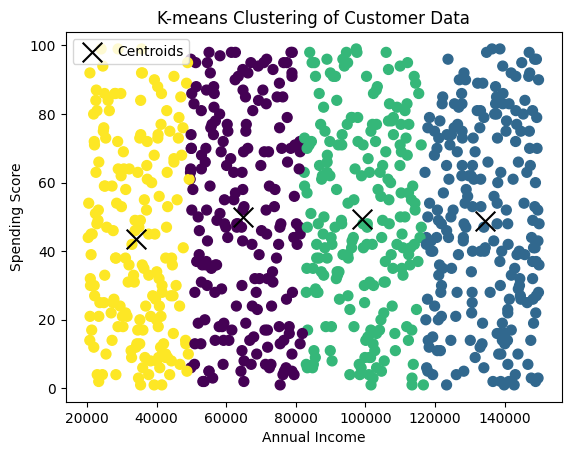

In [ ]:
# Plot the clusters in 2D
plt.scatter(x_train['Annual Income'], x_train['Spending Score'], c=x_train['group'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='black', marker='x', s=200, label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering of Customer Data')
plt.legend()
plt.show()

#evaluation

In [ ]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [ ]:
x_pred=kmeans.predict(x_test)

In [ ]:
silhouette_avg = silhouette_score(x_test, x_pred)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: 0.564


In [ ]:
db_index = davies_bouldin_score(x_test,x_pred)
print(f"Davies-Bouldin index: {db_index:.3f}")

Davies-Bouldin index: 0.518
